In [1]:
# Cell 1 — imports + helpers (Polars)
import polars as pl
import numpy as np
import re
# Visualization of the dataframe
import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from scripts import style
style.mpl_apply()

In [2]:
path = "data/processed/Canada Vigilance Adverse Reaction Online Database/"
# pair_ohe = pl.read_parquet(path + "pair_ohe_full.parquet")

In [3]:
merge = pl.read_parquet(path + "merge_clean_df.parquet")

In [10]:
merge

REPORT_ID,REPORT_NO,DATRECEIVED,DATINTRECEIVED,REPORT_TYPE_ENG,GENDER_CODE,OUTCOME_ENG,SERIOUSNESS_ENG,DEATH,DISABILITY,CONGENITAL_ANOMALY,LIFE_THREATENING,HOSP_REQUIRED,OTHER_MEDICALLY_IMP_COND,REPORTER_TYPE_ENG,SOURCE_ENG,DRUGNAME,DRUGINVOLV_ENG,ROUTEADMIN_ENG,UNIT_DOSE_QTY,DOSE_UNIT_ENG,DOSAGEFORM_ENG,PT_NAME_ENG,SOC_NAME_ENG,INDICATION_NAME_ENG,ACTIVE_INGREDIENT_NAME,AGE_Y,WEIGHT_KG,HEIGHT_CM,hours_between_medicament
i64,i64,date,date,str,str,str,str,i8,i8,i8,i8,i8,i8,str,str,str,str,str,f64,str,str,str,str,str,str,f64,f64,f64,f64
305014,305014,2008-04-21,2008-04-21,"""Spontaneous""","""M""","""Unknown""","""Serious""",null,null,null,null,null,1,"""Other health professional""","""MAH""","""CEFAZOLIN FOR INJECTION, USP""","""Suspect""","""Intravenous (not otherwise spe…",null,"""""","""POWDER FOR SOLUTION INTRAMUSCU…","""Infection""","""Infections and infestations""","""Infection""","""cefazolin""",57.0,93.2,null,null
305014,305014,2008-04-21,2008-04-21,"""Spontaneous""","""M""","""Unknown""","""Serious""",null,null,null,null,null,1,"""Other health professional""","""MAH""","""CEFAZOLIN FOR INJECTION, USP""","""Suspect""","""Intravenous (not otherwise spe…",null,"""""","""POWDER FOR SOLUTION INTRAMUSCU…","""Rash""","""Skin and subcutaneous tissue d…","""Infection""","""cefazolin""",57.0,93.2,null,null
305014,305014,2008-04-21,2008-04-21,"""Spontaneous""","""M""","""Unknown""","""Serious""",null,null,null,null,null,1,"""Other health professional""","""MAH""","""CEFAZOLIN FOR INJECTION, USP""","""Suspect""","""Intravenous (not otherwise spe…",null,"""""","""POWDER FOR SOLUTION INTRAMUSCU…","""Cyanosis""","""Vascular disorders""","""Infection""","""cefazolin""",57.0,93.2,null,null
303952,303952,2008-05-22,2008-05-22,"""Published""","""F""","""Fatal""","""Serious""",1,null,null,null,null,null,"""Consumer/other non health prof…","""MAH""","""CEFUROXIME FOR INJECTION USP""","""Suspect""","""Intravenous (not otherwise spe…",150.0,"""mg/kg""","""POWDER FOR SOLUTION INTRAMUSCU…","""Pneumonia necrotising""","""Infections and infestations""","""Infection""","""cefuroxime""",3.0,null,null,24.0
303952,303952,2008-05-22,2008-05-22,"""Published""","""F""","""Fatal""","""Serious""",1,null,null,null,null,null,"""Consumer/other non health prof…","""MAH""","""CEFUROXIME FOR INJECTION USP""","""Suspect""","""Intravenous (not otherwise spe…",150.0,"""mg/kg""","""POWDER FOR SOLUTION INTRAMUSCU…","""Pneumonia necrotising""","""Infections and infestations""","""Infection""","""cefuroxime salt not specified""",3.0,null,null,24.0
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
907353481,null,2025-06-23,2024-06-18,"""Spontaneous""","""F""","""Not recovered/not resolved""","""Serious""",2,2,2,2,2,1,"""Other health professional""","""MAH""","""CEFADROXIL""","""Concomitant""","""Unknown""",500.0,"""Milligram""","""NOT SPECIFIED""","""Drug hypersensitivity""","""Immune system disorders""","""Product used for unknown indic…","""cefadroxil""",65.0,34.0,null,12.0
907353481,null,2025-06-23,2024-06-18,"""Spontaneous""","""F""","""Not recovered/not resolved""","""Serious""",2,2,2,2,2,1,"""Other health professional""","""MAH""","""CEFADROXIL""","""Concomitant""","""Unknown""",500.0,"""Milligram""","""NOT SPECIFIED""","""Chest pain""","""General disorders and administ…","""Product used for unknown indic…","""cefadroxil""",65.0,34.0,null,12.0
907353481,null,2025-06-23,2024-06-18,"""Spontaneous""","""F""","""Not recovered/not resolved""","""Serious""",2,2,2,2,2,1,"""Other health professional""","""MAH""","""CEFADROXIL""","""Concomitant""","""Unknown""",500.0,"""Milligram""","""NOT SPECIFIED""","""Asthma""","""Respiratory, thoracic and medi…","""Product used for unknown indic…","""cefadroxil""",65.0,34.0,null,12.0


In [19]:
# seect REPORT_ID and DATRECEIVED
data = merge.select(["REPORT_ID", "DATRECEIVED"])
# keep only the first reprort_id if there are multiple
data = data.unique(subset=["REPORT_ID"])
data

REPORT_ID,DATRECEIVED
i64,date
907901888,2025-03-10
901073392,2022-07-15
904131619,2021-05-10
1139101,2025-02-25
454477,2012-08-01
…,…
907722539,2024-12-16
907918772,2025-05-13
902820020,2019-10-02


In [20]:
# get the distribution of DATERECEIVED by year, right now they are in YYYMMDD format
dates = data.select("DATRECEIVED").to_series().to_list()
years = [int(str(date)[:4]) for date in dates]
year_counts = np.unique(years, return_counts=True)
year_counts

(array([2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
        2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025]),
 array([  2, 105, 107, 126,  88, 120, 165, 158, 139, 154, 233, 281, 599,
        549, 527, 582, 582, 614, 356]))

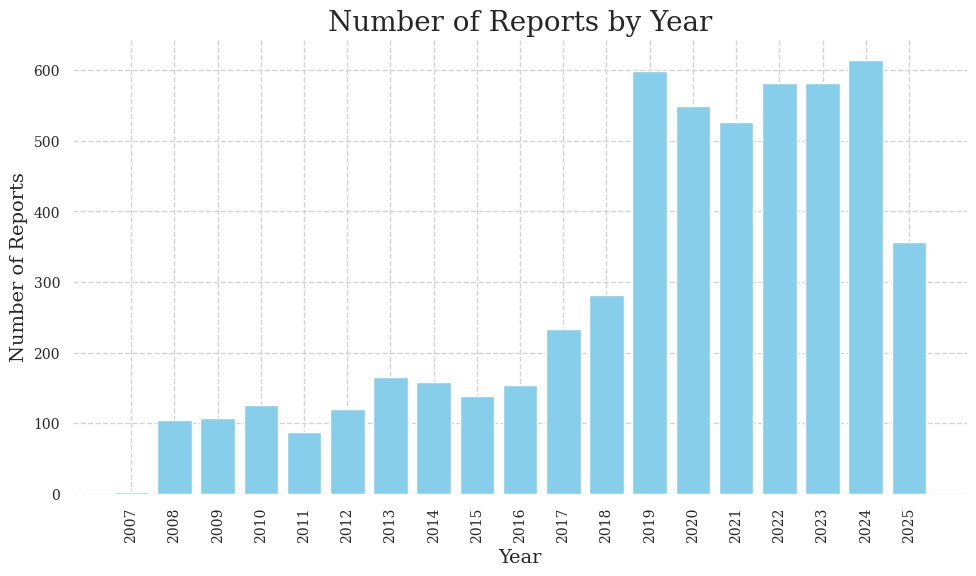

In [21]:
# plot the year counts
plt.figure(figsize=(10, 6))
plt.bar(year_counts[0], year_counts[1], color='skyblue')
plt.xlabel("Year")
plt.ylabel("Number of Reports")
plt.xticks(year_counts[0], rotation=90)
plt.title("Number of Reports by Year")
plt.savefig('visualizations/canada/00_05.pdf', bbox_inches='tight')
plt.tight_layout()
plt.show()

In [7]:
data = merge.select([
    "REPORT_ID",
    "GENDER_CODE",
    "DISABILITY",
    "CONGENITAL_ANOMALY",
    "OTHER_MEDICALLY_IMP_COND",
    "AGE_Y",
    "WEIGHT_KG",
    "HEIGHT_CM"])

In [9]:
data

REPORT_ID,GENDER_CODE,DISABILITY,CONGENITAL_ANOMALY,OTHER_MEDICALLY_IMP_COND,AGE_Y,WEIGHT_KG,HEIGHT_CM
i64,str,i8,i8,i8,f64,f64,f64
305014,"""M""",null,null,1,57.0,93.2,null
305014,"""M""",null,null,1,57.0,93.2,null
305014,"""M""",null,null,1,57.0,93.2,null
303952,"""F""",null,null,null,3.0,null,null
303952,"""F""",null,null,null,3.0,null,null
…,…,…,…,…,…,…,…
907353481,"""F""",2,2,1,65.0,34.0,null
907353481,"""F""",2,2,1,65.0,34.0,null
907353481,"""F""",2,2,1,65.0,34.0,null


# Canada Census

In [1]:
import polars as pl
canada2016 = pl.read_parquet("data/processed/canada_census_2016.parquet")
canada2021 = pl.read_parquet("data/processed/canada_census_2021.parquet")

In [2]:
canada2016

Reference Period,Geo,Census Year,Age,Total,Men,Women,__index_level_0__
i64,str,i64,i64,f64,f64,f64,i64
2021,"""Canada""",2016,1,372615.0,190900.0,181710.0,132
2021,"""Canada""",2016,2,378880.0,193935.0,184940.0,133
2021,"""Canada""",2016,3,386200.0,198610.0,187585.0,134
2021,"""Canada""",2016,4,391365.0,200500.0,190865.0,135
2021,"""Canada""",2016,5,394530.0,202495.0,192035.0,137
…,…,…,…,…,…,…,…
2021,"""Canada""",2016,95,20980.0,5365.0,15615.0,248
2021,"""Canada""",2016,96,14855.0,3505.0,11355.0,249
2021,"""Canada""",2016,97,9485.0,2075.0,7410.0,250


#

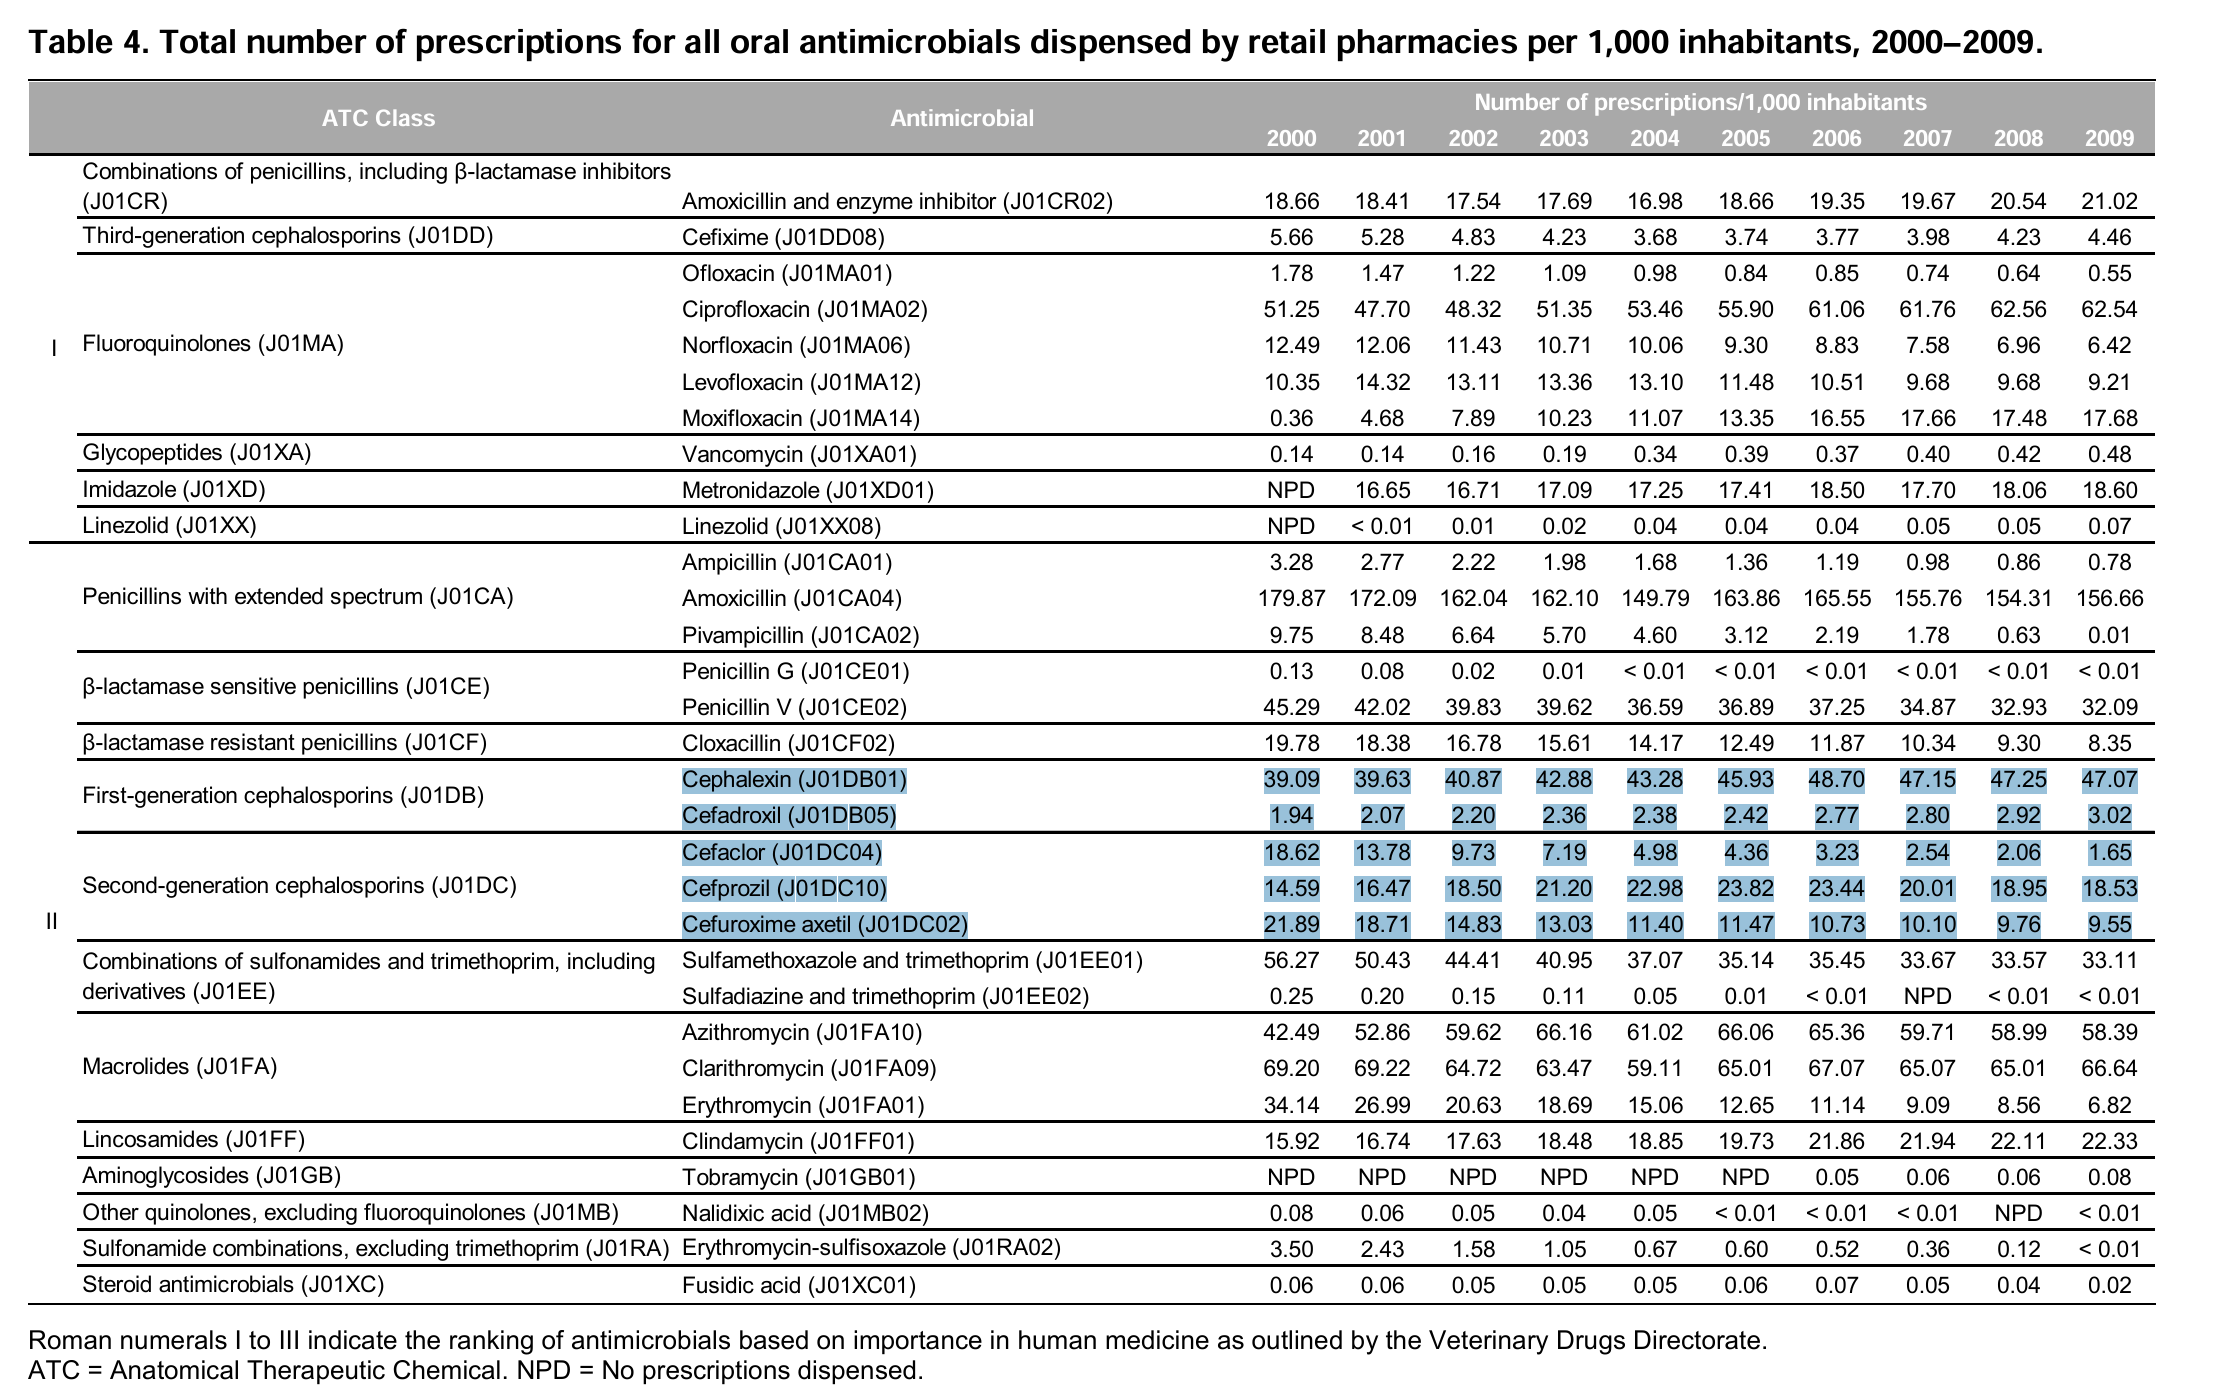

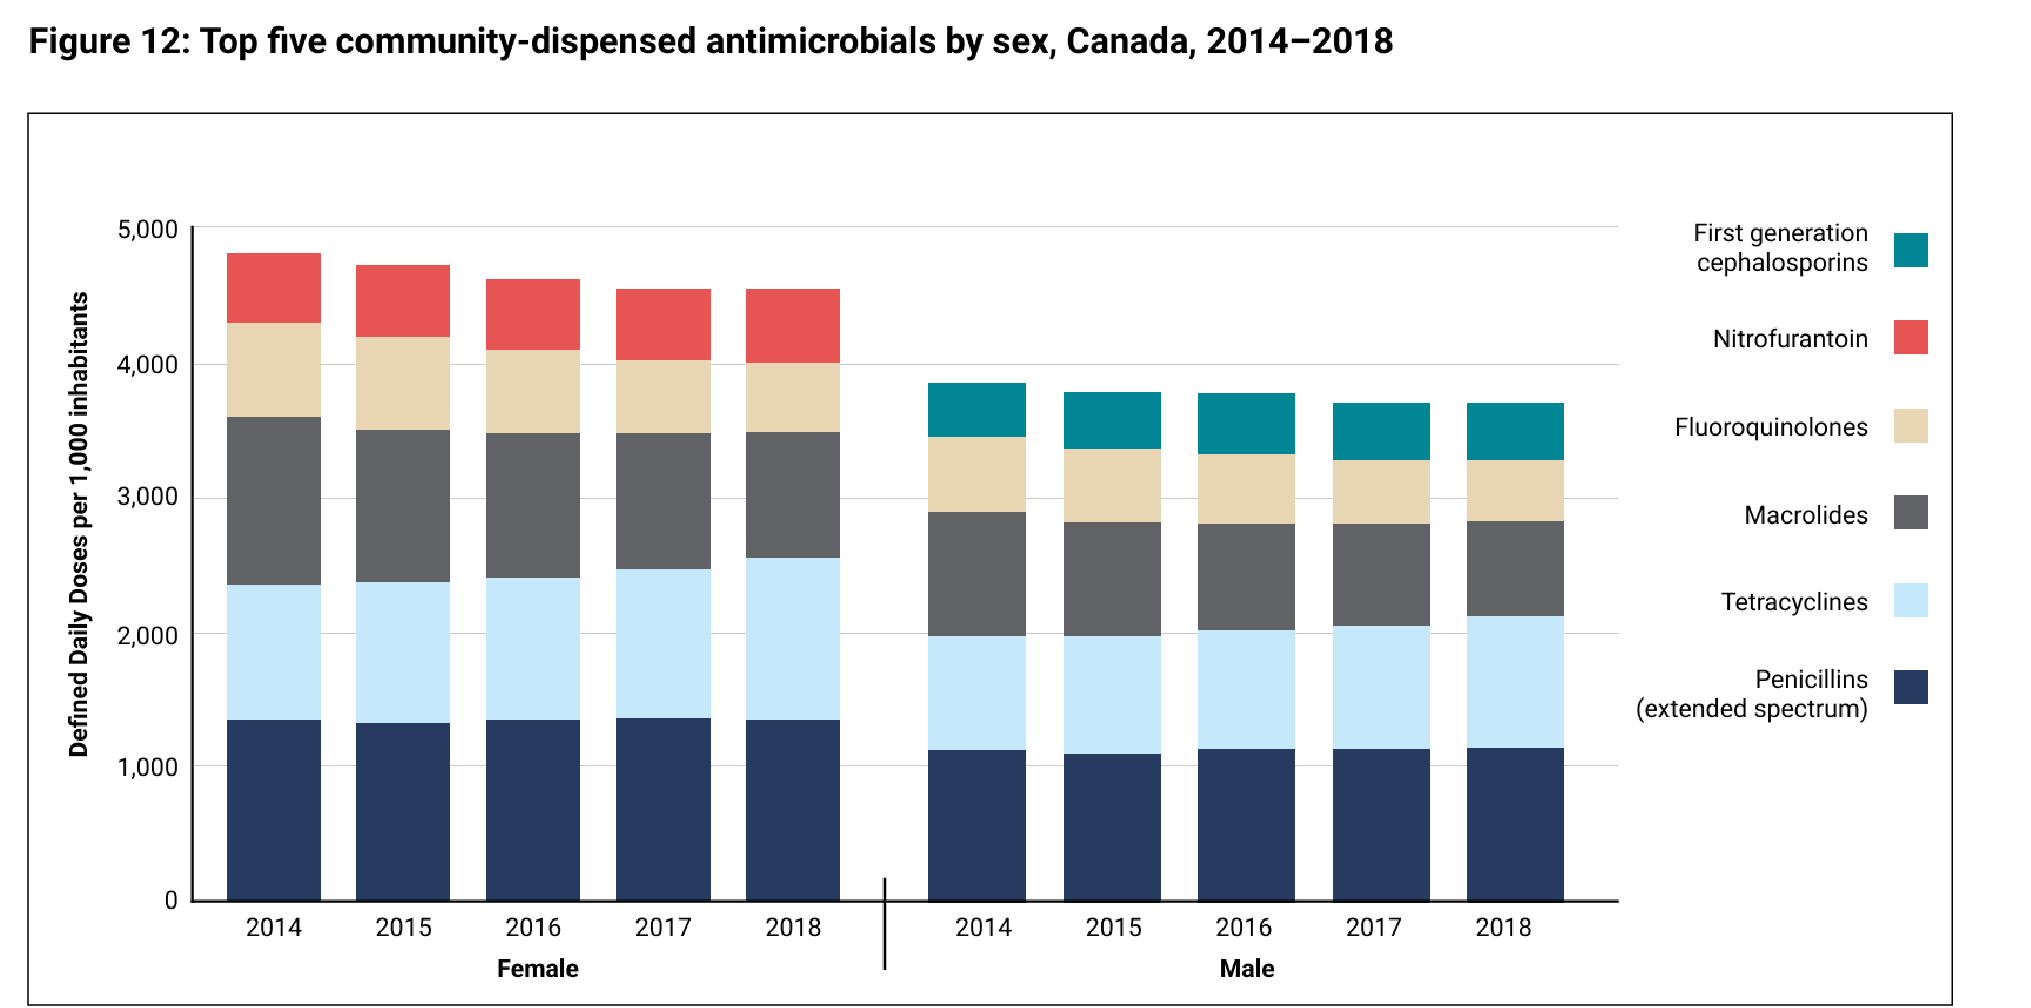

# Cefs

In [4]:
import pandas as pd
cefs = pd.read_csv("data/raw/cephalosporins_by_region_quarter.csv")
cefs

,Antimicrobial_Class,Year,Quarter,BC_DDD,BC_Prescriptions,Prairies_DDD,Prairies_Prescriptions,Ontario_DDD,Ontario_Prescriptions,Quebec_DDD,Quebec_Prescriptions,Atlantic_DDD,Atlantic_Prescriptions,Canada_DDD,Canada_Prescriptions
0,1st gen cephalosporins,2020,Q3,369.19,52.12,464.23,65.11,454.75,58.43,202.22,35.08,472.21,61.40,387.64,53.54
1,1st gen cephalosporins,2020,Q4,359.73,50.88,450.83,63.12,450.43,57.64,196.73,34.28,467.18,60.53,380.66,52.46
2,1st gen cephalosporins,2021,Q1,352.52,50.03,440.33,61.53,446.65,57.04,194.47,33.75,461.76,59.80,375.52,51.67
3,1st gen cephalosporins,2021,Q2,357.51,51.01,446.26,62.25,459.99,58.80,201.57,34.87,468.26,60.91,384.48,52.94
4,1st gen cephalosporins,2021,Q3,358.00,51.15,442.26,61.57,462.06,59.44,201.45,34.70,467.65,60.87,384.54,53.04
5,1st gen cephalosporins,2021,Q4,358.95,51.28,441.34,61.55,461.34,59.53,204.48,34.80,466.45,60.76,384.83,53.10
6,1st gen cephalosporins,2022,Q1,349.46,49.89,433.74,60.68,448.94,58.01,201.64,34.55,454.21,59.17,376.13,52.02
7,1st gen cephalosporins,2022,Q2,344.92,49.34,435.08,61.01,448.64,58.46,198.98,34.33,454.68,59.08,375.07,52.13
8,1st gen cephalosporins,2022,Q3,343.45,49.43,434.26,61.14,447.09,58.44,199.01,34.58,455.36,59.09,374.16,52.21
9,1st gen cephalosporins,2022,Q4,342.18,49.63,438.75,62.03,445.08,58.70,198.42,35.17,460.17,59.76,374.21,52.68


In [6]:
cefs = cefs[["Antimicrobial_Class",	"Year",	"Canada_DDD",	"Canada_Prescriptions"]]
cefs

,Antimicrobial_Class,Year,Canada_DDD,Canada_Prescriptions
0,1st gen cephalosporins,2020,387.64,53.54
1,1st gen cephalosporins,2020,380.66,52.46
2,1st gen cephalosporins,2021,375.52,51.67
3,1st gen cephalosporins,2021,384.48,52.94
4,1st gen cephalosporins,2021,384.54,53.04
5,1st gen cephalosporins,2021,384.83,53.10
6,1st gen cephalosporins,2022,376.13,52.02
7,1st gen cephalosporins,2022,375.07,52.13
8,1st gen cephalosporins,2022,374.16,52.21
9,1st gen cephalosporins,2022,374.21,52.68


In [7]:
# sum if they have the same year
cefs = cefs.groupby(["Antimicrobial_Class", "Year"], as_index=False).sum()
cefs

,Antimicrobial_Class,Year,Canada_DDD,Canada_Prescriptions
0,1st gen cephalosporins,2020,768.30,106.00
1,1st gen cephalosporins,2021,1529.37,210.75
2,1st gen cephalosporins,2022,1499.57,209.04
3,1st gen cephalosporins,2023,1538.61,219.01
4,1st gen cephalosporins,2024,1556.29,224.33
5,1st gen cephalosporins,2025,764.45,111.42
6,2/3rd gen cephalosporins,2020,330.72,36.63
7,2/3rd gen cephalosporins,2021,493.13,58.05
8,2/3rd gen cephalosporins,2022,584.43,71.05
9,2/3rd gen cephalosporins,2023,691.32,82.87


In [8]:
# drop 2020 and 205
cefs = cefs[cefs["Year"] > 2020]
cefs = cefs[cefs["Year"] < 2025]
cefs


,Antimicrobial_Class,Year,Canada_DDD,Canada_Prescriptions
1,1st gen cephalosporins,2021,1529.37,210.75
2,1st gen cephalosporins,2022,1499.57,209.04
3,1st gen cephalosporins,2023,1538.61,219.01
4,1st gen cephalosporins,2024,1556.29,224.33
7,2/3rd gen cephalosporins,2021,493.13,58.05
8,2/3rd gen cephalosporins,2022,584.43,71.05
9,2/3rd gen cephalosporins,2023,691.32,82.87
10,2/3rd gen cephalosporins,2024,683.02,81.60
13,4/5th gen cephalosporins,2021,0.21,0.04
14,4/5th gen cephalosporins,2022,0.26,0.04


In [9]:
# save to processed data
cefs.to_csv("data/processed/cephalosporins_canada.csv", index=False)